In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))        
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    X_train = np.hstack([X_train, np.ones((X_train.shape[0],1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0],1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Validation data shape:', X_val.shape)
print('Validation labels shape:', y_val.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:',y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape: (49000,)
Validation data shape: (1000, 3073)
Validation labels shape: (1000,)
Test data shape: (1000, 3073)
Test labels shape: (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


In [4]:
from cs231n.classifiers.softmax import softmax_loss_naive
import time

W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))  # sanity明智

loss: 2.336511
sanity check: 2.302585


**My answer:** *因为共有10个分类，随机情况下取到每一个类的概率为1/10，同时最终的loss是按照-log(标准化概率)来取值的，所以为-log(0,1)*

In [5]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)
# print (loss, grad)
from cs231n.gradient_check import grad_check_sparse
f = lambda w : softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w : softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

(2063, 0)
numerical: -2.330695 analytic: -2.330695, relative error: 1.049073e-08
(2624, 3)
numerical: -1.961780 analytic: -1.961780, relative error: 2.197117e-08
(3050, 8)
numerical: 1.863042 analytic: 1.863042, relative error: 4.821963e-08
(2405, 8)
numerical: -0.787826 analytic: -0.787826, relative error: 1.056469e-07
(841, 2)
numerical: -0.746911 analytic: -0.746911, relative error: 4.716843e-08
(2733, 5)
numerical: -0.874583 analytic: -0.874583, relative error: 4.698907e-08
(1627, 3)
numerical: -0.993137 analytic: -0.993137, relative error: 2.724048e-08
(1817, 2)
numerical: -0.617351 analytic: -0.617351, relative error: 1.076099e-07
(94, 1)
numerical: 1.364671 analytic: 1.364671, relative error: 2.533096e-08
(358, 2)
numerical: 0.065765 analytic: 0.065765, relative error: 8.472576e-08
(1130, 4)
numerical: 2.056055 analytic: 2.045366, relative error: 2.606173e-03
(28, 2)
numerical: -0.376325 analytic: -0.379826, relative error: 4.629757e-03
(993, 5)
numerical: 0.085189 analytic: 0.0

In [6]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.00005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord = 'fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.336511e+00 computed in 0.168010s
vectorized loss: 2.336511e+00 computed in 0.006001s
Loss difference: 0.000000
Gradient difference: 0.000000


In [10]:
from cs231n.classifiers import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]
#########################################
for lr in np.arange(learning_rates[0], learning_rates[1], 1e-6):
    for rs in np.arange(regularization_strengths[0], regularization_strengths[1], 5e5):
        print(lr, rs)
        softmax = Softmax()
        softmax.train(X_dev, y_dev, learning_rate=lr, reg=rs, num_iters=2500, verbose=True)
        train_pred = softmax.predict(X_train)
        train_acc = np.mean(train_pred == y_train)
        val_pred = softmax.predict(X_val)
        val_acc = np.mean(val_pred==y_val)
        results[(lr, rs)] = [train_acc, val_acc]
        if best_val < val_acc:
            best_val = val_acc
            best_softmax = softmax
        

1e-07 25000.0
iteration 0 / 2500: loss 761.278903
iteration 100 / 2500: loss 758.440326
iteration 200 / 2500: loss 756.658018
iteration 300 / 2500: loss 755.563826
iteration 400 / 2500: loss 754.625392
iteration 500 / 2500: loss 753.568802
iteration 600 / 2500: loss 753.090607
iteration 700 / 2500: loss 752.223473
iteration 800 / 2500: loss 751.620165
iteration 900 / 2500: loss 751.189988
iteration 1000 / 2500: loss 750.775221
iteration 1100 / 2500: loss 750.178585
iteration 1200 / 2500: loss 749.690738
iteration 1300 / 2500: loss 749.416573
iteration 1400 / 2500: loss 749.278984
iteration 1500 / 2500: loss 749.016263
iteration 1600 / 2500: loss 748.710654
iteration 1700 / 2500: loss 748.512585
iteration 1800 / 2500: loss 748.141785
iteration 1900 / 2500: loss 748.029638
iteration 2000 / 2500: loss 747.926707
iteration 2100 / 2500: loss 747.919644
iteration 2200 / 2500: loss 747.792718
iteration 2300 / 2500: loss 747.663262
iteration 2400 / 2500: loss 747.568867
1.1e-06 25000.0
iterati

iteration 1000 / 2500: loss 892.077474
iteration 1100 / 2500: loss 900.015759
iteration 1200 / 2500: loss 907.298667
iteration 1300 / 2500: loss 914.201298
iteration 1400 / 2500: loss 920.729144
iteration 1500 / 2500: loss 926.802012
iteration 1600 / 2500: loss 932.585035
iteration 1700 / 2500: loss 938.093410
iteration 1800 / 2500: loss 943.382536
iteration 1900 / 2500: loss 948.369249
iteration 2000 / 2500: loss 953.194845
iteration 2100 / 2500: loss 957.837801
iteration 2200 / 2500: loss 962.281522
iteration 2300 / 2500: loss 966.558259
iteration 2400 / 2500: loss 970.704506
9.1e-06 25000.0
iteration 0 / 2500: loss 768.344304
iteration 100 / 2500: loss 771.123317
iteration 200 / 2500: loss 794.497177
iteration 300 / 2500: loss 814.527328
iteration 400 / 2500: loss 831.726900
iteration 500 / 2500: loss 846.505701
iteration 600 / 2500: loss 859.459647
iteration 700 / 2500: loss 870.910671
iteration 800 / 2500: loss 881.282034
iteration 900 / 2500: loss 890.704351
iteration 1000 / 2500

iteration 1900 / 2500: loss 1043.416637
iteration 2000 / 2500: loss 1048.385674
iteration 2100 / 2500: loss 1053.086440
iteration 2200 / 2500: loss 1057.655638
iteration 2300 / 2500: loss 1062.071831
iteration 2400 / 2500: loss 1066.371859
1.71e-05 25000.0
iteration 0 / 2500: loss 775.022294
iteration 100 / 2500: loss 854.824189
iteration 200 / 2500: loss 905.615190
iteration 300 / 2500: loss 926.186925
iteration 400 / 2500: loss 942.439767
iteration 500 / 2500: loss 956.417412
iteration 600 / 2500: loss 968.586499
iteration 700 / 2500: loss 979.367773
iteration 800 / 2500: loss 989.035592
iteration 900 / 2500: loss 998.051233
iteration 1000 / 2500: loss 1006.306069
iteration 1100 / 2500: loss 1014.022828
iteration 1200 / 2500: loss 1021.299128
iteration 1300 / 2500: loss 1028.141629
iteration 1400 / 2500: loss 1034.570885
iteration 1500 / 2500: loss 1040.698855
iteration 1600 / 2500: loss 1046.445432
iteration 1700 / 2500: loss 1052.026961
iteration 1800 / 2500: loss 1057.316028
itera

iteration 2400 / 2500: loss 1178.513974
2.51e-05 25000.0
iteration 0 / 2500: loss 757.108055
iteration 100 / 2500: loss 962.845954
iteration 200 / 2500: loss 1055.006825
iteration 300 / 2500: loss 1071.469020
iteration 400 / 2500: loss 1084.122696
iteration 500 / 2500: loss 1094.751508
iteration 600 / 2500: loss 1103.958585
iteration 700 / 2500: loss 1112.302798
iteration 800 / 2500: loss 1119.907946
iteration 900 / 2500: loss 1126.955902
iteration 1000 / 2500: loss 1133.543551
iteration 1100 / 2500: loss 1139.699032
iteration 1200 / 2500: loss 1145.462846
iteration 1300 / 2500: loss 1150.948676
iteration 1400 / 2500: loss 1156.153446
iteration 1500 / 2500: loss 1161.104518
iteration 1600 / 2500: loss 1165.872290
iteration 1700 / 2500: loss 1170.359141
iteration 1800 / 2500: loss 1174.788662
iteration 1900 / 2500: loss 1179.008023
iteration 2000 / 2500: loss 1183.116591
iteration 2100 / 2500: loss 1187.103937
iteration 2200 / 2500: loss 1190.926203
iteration 2300 / 2500: loss 1194.6290

iteration 300 / 2500: loss 1244.972308
iteration 400 / 2500: loss 1255.757374
iteration 500 / 2500: loss 1264.774645
iteration 600 / 2500: loss 1272.682408
iteration 700 / 2500: loss 1279.761163
iteration 800 / 2500: loss 1286.257778
iteration 900 / 2500: loss 1292.258431
iteration 1000 / 2500: loss 1297.896653
iteration 1100 / 2500: loss 1303.191015
iteration 1200 / 2500: loss 1308.184477
iteration 1300 / 2500: loss 1312.848972
iteration 1400 / 2500: loss 1317.322694
iteration 1500 / 2500: loss 1321.585484
iteration 1600 / 2500: loss 1325.705883
iteration 1700 / 2500: loss 1329.668885
iteration 1800 / 2500: loss 1333.484834
iteration 1900 / 2500: loss 1337.142121
iteration 2000 / 2500: loss 1340.664911
iteration 2100 / 2500: loss 1344.026247
iteration 2200 / 2500: loss 1347.301388
iteration 2300 / 2500: loss 1350.509677
iteration 2400 / 2500: loss 1353.620439
3.41e-05 25000.0
iteration 0 / 2500: loss 777.263293
iteration 100 / 2500: loss 1185.893534
iteration 200 / 2500: loss 1338.277

iteration 800 / 2500: loss 1667.979534
iteration 900 / 2500: loss 1671.935507
iteration 1000 / 2500: loss 1675.551354
iteration 1100 / 2500: loss 1678.974832
iteration 1200 / 2500: loss 1682.174624
iteration 1300 / 2500: loss 1685.181206
iteration 1400 / 2500: loss 1688.155845
iteration 1500 / 2500: loss 1690.951447
iteration 1600 / 2500: loss 1693.646708
iteration 1700 / 2500: loss 1696.247211
iteration 1800 / 2500: loss 1698.733555
iteration 1900 / 2500: loss 1701.122558
iteration 2000 / 2500: loss 1703.423841
iteration 2100 / 2500: loss 1705.683809
iteration 2200 / 2500: loss 1707.867557
iteration 2300 / 2500: loss 1710.005831
iteration 2400 / 2500: loss 1712.041517
4.21e-05 25000.0
iteration 0 / 2500: loss 769.600683
iteration 100 / 2500: loss 1342.813064
iteration 200 / 2500: loss 1585.814487
iteration 300 / 2500: loss 1638.673707
iteration 400 / 2500: loss 1645.771314
iteration 500 / 2500: loss 1651.638584
iteration 600 / 2500: loss 1656.807282
iteration 700 / 2500: loss 1661.409

iteration 1300 / 2500: loss 1991.646268
iteration 1400 / 2500: loss 1994.083833
iteration 1500 / 2500: loss 1996.378781
iteration 1600 / 2500: loss 1998.586050
iteration 1700 / 2500: loss 2000.714869
iteration 1800 / 2500: loss 2002.737566
iteration 1900 / 2500: loss 2004.722433
iteration 2000 / 2500: loss 2006.626186
iteration 2100 / 2500: loss 2008.496202
iteration 2200 / 2500: loss 2010.309164
iteration 2300 / 2500: loss 2012.063501
iteration 2400 / 2500: loss 2013.749068


In [8]:
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (lr, reg, train_accuracy, val_accuracy))
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.229367 val accuracy: 0.255000
lr 1.100000e-06 reg 2.500000e+04 train accuracy: 0.258878 val accuracy: 0.276000
lr 2.100000e-06 reg 2.500000e+04 train accuracy: 0.260490 val accuracy: 0.267000
lr 3.100000e-06 reg 2.500000e+04 train accuracy: 0.263163 val accuracy: 0.268000
lr 4.100000e-06 reg 2.500000e+04 train accuracy: 0.260408 val accuracy: 0.273000
lr 5.100000e-06 reg 2.500000e+04 train accuracy: 0.261184 val accuracy: 0.275000
lr 6.100000e-06 reg 2.500000e+04 train accuracy: 0.259163 val accuracy: 0.287000
lr 7.100000e-06 reg 2.500000e+04 train accuracy: 0.263959 val accuracy: 0.274000
lr 8.100000e-06 reg 2.500000e+04 train accuracy: 0.263612 val accuracy: 0.281000
lr 9.100000e-06 reg 2.500000e+04 train accuracy: 0.261347 val accuracy: 0.277000
lr 1.010000e-05 reg 2.500000e+04 train accuracy: 0.260898 val accuracy: 0.273000
lr 1.110000e-05 reg 2.500000e+04 train accuracy: 0.262673 val accuracy: 0.269000
lr 1.210000e-05 reg 2.500000

In [9]:
test_pred = best_softmax.predict(X_test)
test_acc = np.mean(y_test == test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_acc, ))

softmax on raw pixels final test set accuracy: 0.259000


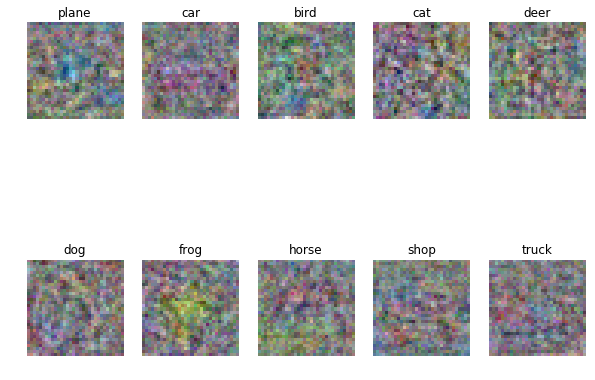

In [14]:
w = best_softmax.W[:-1, :]
w = w.reshape(32, 32, 3, 10)

w_min,  w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'shop', 'truck']
for i in range(10):
    plt.subplot(2, 5, i+1)
    # squeeze将shape中为1的维度去掉，即这里的最后一维
    wimg = 255.0 * (w[:,:,:,i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])